<a href="https://colab.research.google.com/github/iqalllz/Amazon-Sales-Data-Analysis/blob/main/Sales_data_analysis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

Setting display options for better readability

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [11]:
df = pd.read_csv('amazon_sales_data.csv')

In [12]:
# 1. Initial Exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
df.head()



Dataset Shape: (1465, 16)

First 5 rows of the dataset:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [13]:
print("\nDataset Information:")
df.info()

print("\nSummary Statistics:")
df.describe(include='all')

print("\nMissing Values Count:")
df.isnull().sum()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-nul

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [14]:
# 3. Data Cleaning and Preprocessing

# Check for duplicate entries
print("\nNumber of duplicated rows:", df.duplicated().sum())

# Function to clean price columns by removing currency symbols and converting to float
def clean_price(price):
    if pd.isna(price):
        return np.nan
    # Remove currency symbols, commas and convert to float
    try:
        clean = re.sub(r'[^\d.]', '', str(price))
        return float(clean) if clean else np.nan
    except:
        return np.nan

# Apply cleaning to price columns
if 'discounted_price' in df.columns:
    df['discounted_price'] = df['discounted_price'].apply(clean_price)
if 'actual_price' in df.columns:
    df['actual_price'] = df['actual_price'].apply(clean_price)

# Calculate discount percentage if applicable
if 'discounted_price' in df.columns and 'actual_price' in df.columns:
    df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Handle missing values
print("\nHandling missing values...")
# For categorical columns - fill with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna('Unknown', inplace=True)

# For numerical columns - fill with median
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())


Number of duplicated rows: 0

Handling missing values...
Missing values after cleaning:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64



---- Category Analysis ----

---- Price Analysis ----


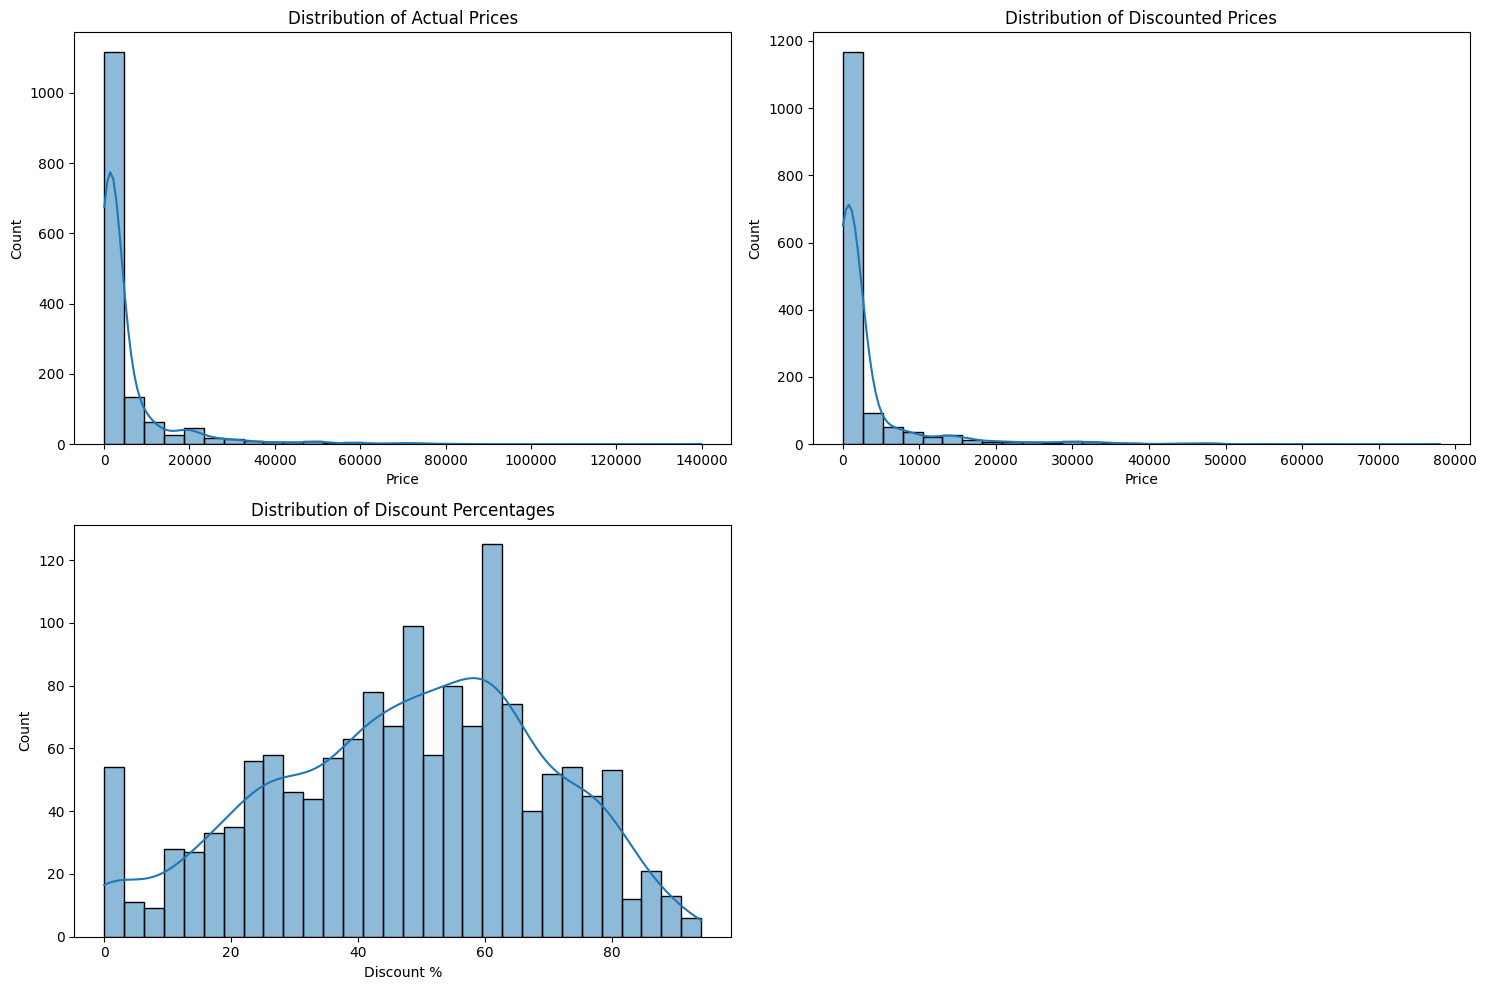


---- Ratings Analysis ----
Rating distribution:
rating
2        1
2.3      1
2.6      1
2.8      2
2.9      1
3        1
3.0      3
3.1      4
3.2      2
3.3     16
3.4     10
3.5     26
3.6     35
3.7     42
3.8     86
3.9    123
4       52
4.0    129
4.1    244
4.2    228
4.3    230
4.4    123
4.5     75
4.6     17
4.7      6
4.8      3
5.0      3
|        1
Name: count, dtype: int64


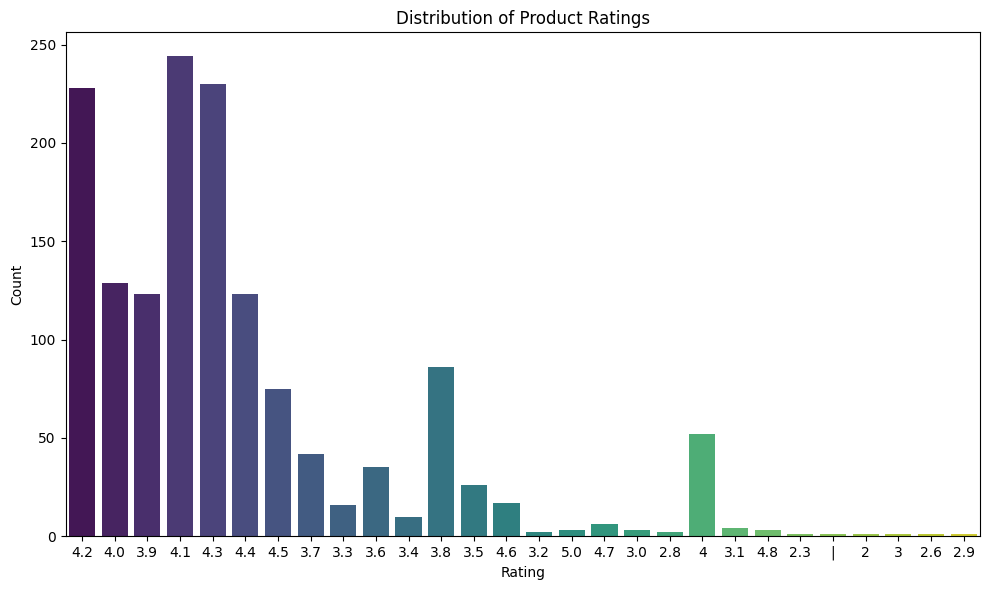


---- Correlation Analysis ----
Correlation matrix:
                     discounted_price  actual_price  discount_percentage
discounted_price                 1.00          0.96                -0.24
actual_price                     0.96          1.00                -0.12
discount_percentage             -0.24         -0.12                 1.00


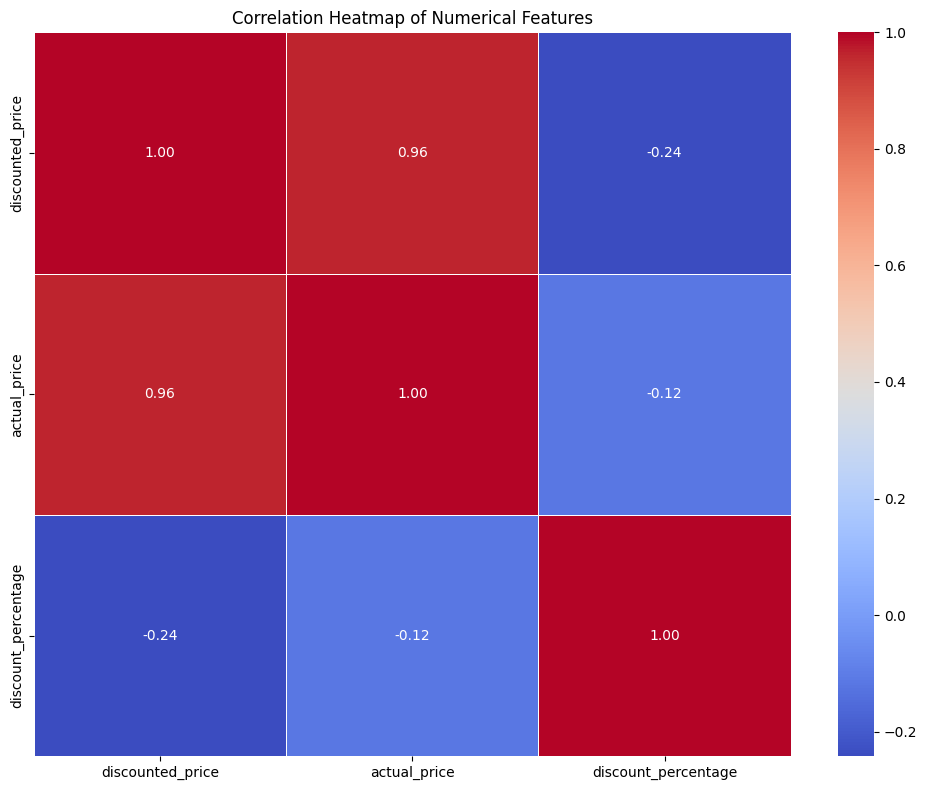

In [15]:
# 4. Exploratory Data Analysis (EDA)

# 4.1 Category Analysis
print("\n---- Category Analysis ----")
if 'main_category' in df.columns:
    category_counts = df['main_category'].value_counts()
    print("Number of products by main category:")
    print(category_counts)

    plt.figure(figsize=(12, 6))
    category_counts.plot(kind='bar')
    plt.title('Number of Products by Main Category')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if 'sub_category' in df.columns:
    # Top 10 sub-categories
    subcategory_counts = df['sub_category'].value_counts().head(10)
    print("\nTop 10 sub-categories by product count:")
    print(subcategory_counts)

    plt.figure(figsize=(12, 6))
    subcategory_counts.plot(kind='bar')
    plt.title('Top 10 Sub-Categories by Product Count')
    plt.xlabel('Sub-Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4.2 Price Analysis
print("\n---- Price Analysis ----")
if 'discounted_price' in df.columns and 'actual_price' in df.columns:
    plt.figure(figsize=(15, 10))

    # Histogram of actual prices
    plt.subplot(2, 2, 1)
    sns.histplot(df['actual_price'].dropna(), kde=True, bins=30)
    plt.title('Distribution of Actual Prices')
    plt.xlabel('Price')

    # Histogram of discounted prices
    plt.subplot(2, 2, 2)
    sns.histplot(df['discounted_price'].dropna(), kde=True, bins=30)
    plt.title('Distribution of Discounted Prices')
    plt.xlabel('Price')

    # Histogram of discount percentages
    plt.subplot(2, 2, 3)
    sns.histplot(df['discount_percentage'].dropna(), kde=True, bins=30)
    plt.title('Distribution of Discount Percentages')
    plt.xlabel('Discount %')

    # Boxplot of prices by category (if available)
    if 'main_category' in df.columns:
        plt.subplot(2, 2, 4)
        sns.boxplot(x='main_category', y='discounted_price', data=df)
        plt.title('Price Distribution by Category')
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

    # Price statistics by category
    if 'main_category' in df.columns:
        price_by_category = df.groupby('main_category')['discounted_price'].agg(['mean', 'median', 'min', 'max'])
        print("\nPrice statistics by category:")
        print(price_by_category.sort_values('mean', ascending=False))

# 4.3 Ratings Analysis
if 'rating' in df.columns:
    print("\n---- Ratings Analysis ----")
    print("Rating distribution:")
    rating_counts = df['rating'].value_counts().sort_index()
    print(rating_counts)

    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=df, palette='viridis')
    plt.title('Distribution of Product Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Average rating by category
    if 'main_category' in df.columns:
        avg_rating_by_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
        print("\nAverage rating by category:")
        print(avg_rating_by_category)

        plt.figure(figsize=(12, 6))
        avg_rating_by_category.plot(kind='bar')
        plt.title('Average Rating by Category')
        plt.xlabel('Category')
        plt.ylabel('Average Rating')
        plt.axhline(y=df['rating'].mean(), color='r', linestyle='--', label='Overall Average')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 4.4 Correlation Analysis
print("\n---- Correlation Analysis ----")
# Select numerical columns for correlation
num_df = df.select_dtypes(include=['number'])
correlation = num_df.corr()
print("Correlation matrix:")
print(correlation)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [16]:
# 5. Brand Analysis
if 'brand' in df.columns:
    print("\n---- Brand Analysis ----")
    # Top 10 brands by product count
    top_brands = df['brand'].value_counts().head(10)
    print("Top 10 brands by product count:")
    print(top_brands)

    plt.figure(figsize=(12, 6))
    top_brands.plot(kind='bar')
    plt.title('Top 10 Brands by Product Count')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Average price by top brands
    top_brand_names = top_brands.index
    top_brand_df = df[df['brand'].isin(top_brand_names)]

    plt.figure(figsize=(12, 6))
    sns.barplot(x='brand', y='discounted_price', data=top_brand_df, palette='viridis')
    plt.title('Average Discounted Price by Top Brands')
    plt.xlabel('Brand')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Average rating by top brands
    if 'rating' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.barplot(x='brand', y='rating', data=top_brand_df, palette='viridis')
        plt.title('Average Rating by Top Brands')
        plt.xlabel('Brand')
        plt.ylabel('Average Rating')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


---- Discount Analysis ----
Discount percentage statistics:
count   1465.00
mean      47.68
std       21.64
min        0.00
25%       32.00
50%       50.02
75%       62.89
max       94.12
Name: discount_percentage, dtype: float64

Distribution of discount ranges:
discount_bin
0-10%      33
10-20%     88
20-30%    168
30-40%    159
40-50%    230
50%+      739
Name: count, dtype: int64


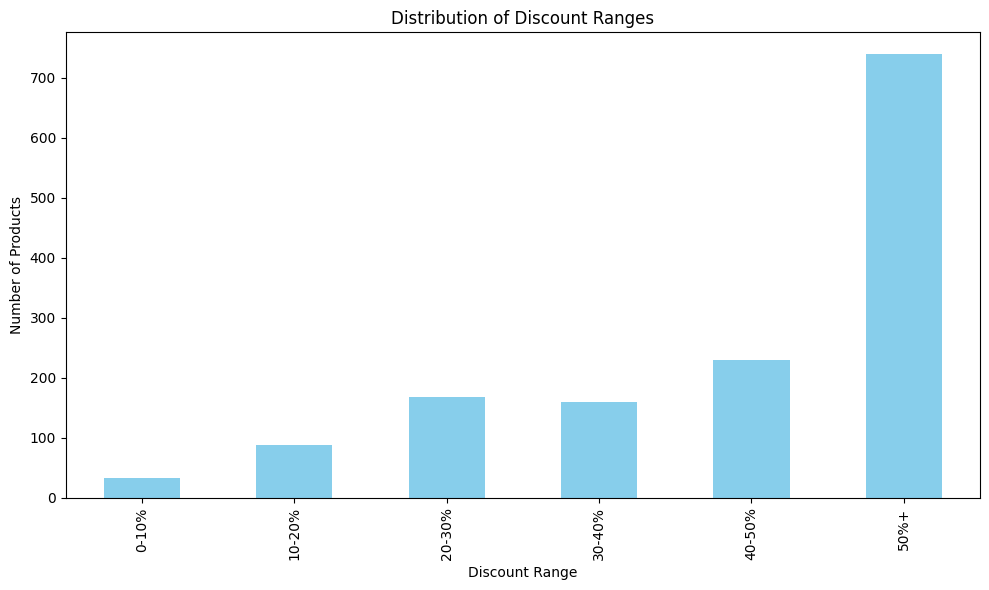

In [17]:
 #6. Discount Analysis
if 'discount_percentage' in df.columns:
    print("\n---- Discount Analysis ----")
    print("Discount percentage statistics:")
    print(df['discount_percentage'].describe())

    # Create discount bins
    df['discount_bin'] = pd.cut(df['discount_percentage'],
                              bins=[0, 10, 20, 30, 40, 50, 100],
                              labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+'])

    discount_dist = df['discount_bin'].value_counts().sort_index()
    print("\nDistribution of discount ranges:")
    print(discount_dist)

    plt.figure(figsize=(10, 6))
    discount_dist.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Discount Ranges')
    plt.xlabel('Discount Range')
    plt.ylabel('Number of Products')
    plt.tight_layout()
    plt.show()

    # Average discount by category
    if 'main_category' in df.columns:
        avg_discount_by_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
        print("\nAverage discount percentage by category:")
        print(avg_discount_by_category)

        plt.figure(figsize=(12, 6))
        avg_discount_by_category.plot(kind='bar')
        plt.title('Average Discount Percentage by Category')
        plt.xlabel('Category')
        plt.ylabel('Average Discount %')
        plt.axhline(y=df['discount_percentage'].mean(), color='r', linestyle='--', label='Overall Average')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [18]:
# 7. Key Insights and Recommendations

print("\n---- Key Insights and Recommendations ----")
print("""
Key Insights:
1. Most popular categories and subcategories have been identified
2. Price distribution analysis shows the range and concentration of product prices
3. Rating analysis reveals customer satisfaction across different categories and brands
4. Discount analysis shows which categories and brands offer the best value

Business Recommendations:
1. Focus on high-rated categories and brands to maintain customer satisfaction
2. Optimize pricing strategy based on category-specific price elasticity
3. Consider adjusting discount strategies for categories with low conversion rates
4. Promote top-performing products more prominently
5. Address categories with lower ratings through product improvements or better curation
""")


---- Key Insights and Recommendations ----

Key Insights:
1. Most popular categories and subcategories have been identified
2. Price distribution analysis shows the range and concentration of product prices
3. Rating analysis reveals customer satisfaction across different categories and brands
4. Discount analysis shows which categories and brands offer the best value

Business Recommendations:
1. Focus on high-rated categories and brands to maintain customer satisfaction
2. Optimize pricing strategy based on category-specific price elasticity
3. Consider adjusting discount strategies for categories with low conversion rates
4. Promote top-performing products more prominently
5. Address categories with lower ratings through product improvements or better curation

